In [ ]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

# Library for Data Manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
!pip install hvplot
import hvplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
!pip install xgboost
!pip install lightgbm
!pip install catboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

print("==================== Packages Loaded ======================")

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
!pip install featuretools
!pip install pandas
import featuretools as ft
import pandas as pd

# Load IBM dataset CSV
df = pd.read_csv("data\HRAttrition-Revised.csv")

# Create an EntitySet
es = ft.EntitySet(id="IBM_HR")

# Add the employee dataframe as an entity with a unique index
es = es.add_dataframe(
    dataframe_name="employees",
    dataframe=df,
    index="EmployeeNumber"
)

# Run DFS to generate features
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="employees",  # use target_dataframe_name instead of target_dataframe
    max_depth=2,
    verbose=True
)

print(feature_matrix.head())


In [6]:
# Display the first 5 rows to get a quick look
print(feature_matrix.head())

# Or use Jupyter's rich display to see the table nicely formatted
feature_matrix.head()

# To see the full list of columns (features) generated
print(feature_matrix.columns.tolist())

# To get summary statistics of all features (numeric mostly)
feature_matrix.describe()

# To check data types of features
feature_matrix.dtypes

                 Age  Attrition  BusinessTravel  DailyRate  Department  \
EmployeeNumber                                                           
0               41.0       True               2     1102.0           2   
1               49.0      False               1      279.0           1   
2               37.0       True               2     1373.0           1   
3               33.0      False               1     1392.0           1   
4               27.0      False               2      591.0           1   

                DistanceFromHome  Education  EducationField  \
EmployeeNumber                                                
0                            1.0          2               1   
1                            8.0          1               1   
2                            2.0          2               4   
3                            3.0          4               1   
4                            2.0          1               3   

                EnvironmentSatisfaction

Age                         float64
Attrition                      bool
BusinessTravel                int64
DailyRate                   float64
Department                    int64
DistanceFromHome            float64
Education                     int64
EducationField                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                       bool
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              

In [7]:
feature_matrix['Income_to_Age_Ratio'] = feature_matrix['MonthlyIncome'] / (feature_matrix['Age'] + 1)
feature_matrix['Is_Senior'] = (feature_matrix['Age'] > 50).astype(int)


In [8]:
feature_matrix.describe().T  # Transposed for easier reading
corr_matrix = feature_matrix.corr()


In [9]:
corr_matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Income_to_Age_Ratio,Is_Senior
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.151695,-0.040873,0.013460,-0.036311,...,0.037510,0.680381,-0.019621,0.008733,0.311309,0.212901,0.216513,0.202089,0.215503,0.635444
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.036376,0.026846,-0.024461,0.029453,...,-0.137145,-0.171063,-0.059478,-0.059572,-0.134392,-0.160545,-0.033019,-0.156199,-0.141049,-0.031556
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,-0.023390,0.023724,0.032832,-0.032981,...,-0.016727,0.034226,0.015240,-0.002514,-0.014575,-0.011497,-0.032591,-0.022636,0.029389,0.052211
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,0.027695,0.037709,0.006968,-0.011716,...,0.042143,0.014515,0.002453,0.028906,-0.034055,0.009932,-0.033229,-0.026363,0.008089,-0.004220
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.029469,0.013720,0.014708,-0.041583,...,-0.012193,-0.015762,0.036875,0.036201,0.022920,0.056315,0.040061,0.034282,0.097118,-0.027227
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.002279,0.002013,-0.005793,-0.001851,...,0.044872,0.004628,-0.036942,0.016787,0.009508,0.018845,0.010029,0.014406,-0.012107,-0.012897
Education,0.151695,-0.036376,-0.023390,0.027695,0.029469,0.002279,1.000000,-0.016100,0.009618,0.010168,...,0.026864,0.080023,-0.019750,-0.028458,0.051637,0.018309,0.023356,0.042929,0.005094,0.082258
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.016100,1.000000,0.011046,-0.002504,...,-0.016185,-0.027848,0.049195,-0.003893,-0.018692,-0.010506,0.002326,-0.004130,-0.035551,-0.004156
EnvironmentSatisfaction,0.013460,-0.024461,0.032832,0.006968,0.014708,-0.005793,0.009618,0.011046,1.000000,0.022195,...,-0.008130,0.006559,-0.029705,0.012553,-0.018114,-0.009043,0.002034,-0.003990,-0.011241,0.008276
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,0.010168,-0.002504,0.022195,1.000000,...,0.012716,-0.046881,-0.038787,-0.012298,-0.029747,-0.041483,-0.026985,-0.030599,-0.026201,-0.031864


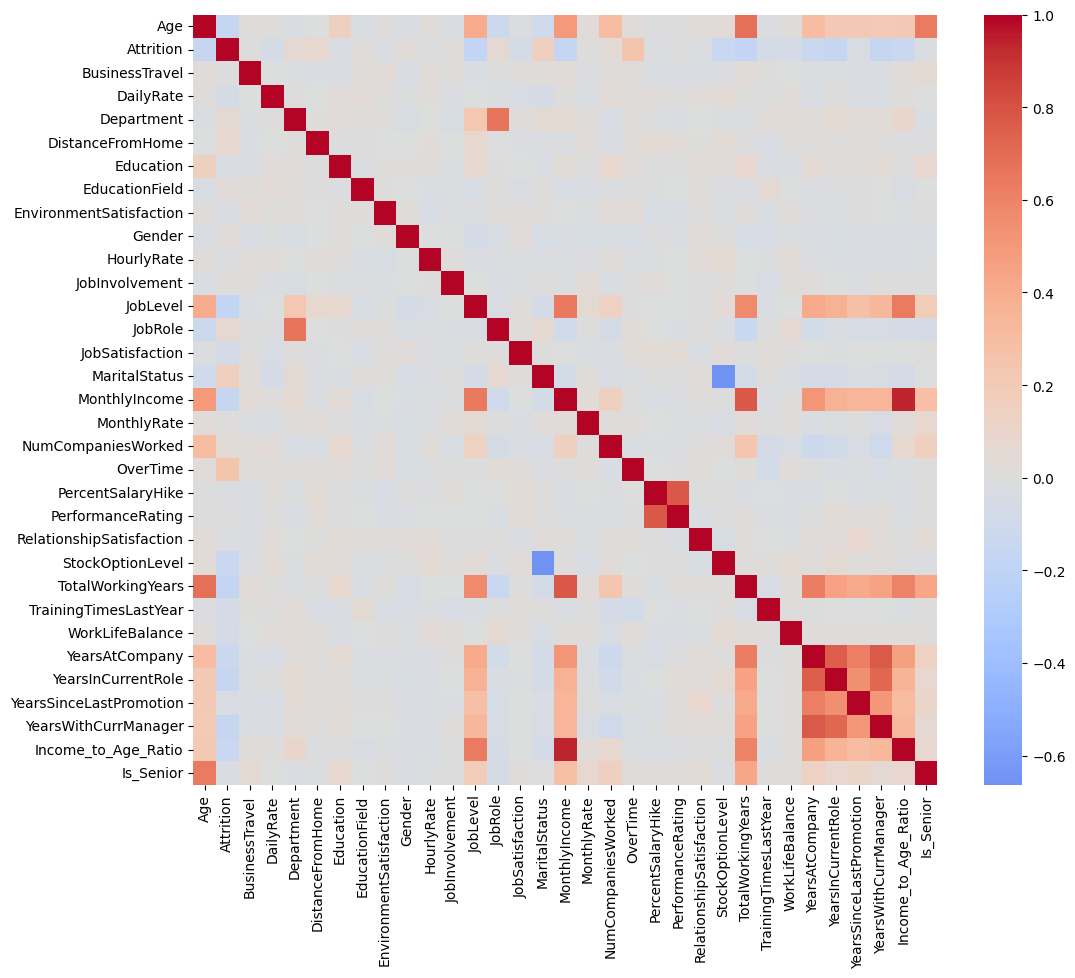

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.show()


In [11]:
high_corr = [(col1, col2, corr_matrix.loc[col1, col2]) 
             for col1 in corr_matrix.columns 
             for col2 in corr_matrix.columns 
             if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.9]
print(high_corr)


[('MonthlyIncome', 'Income_to_Age_Ratio', np.float64(0.9364574846046315)), ('Income_to_Age_Ratio', 'MonthlyIncome', np.float64(0.9364574846046315))]


In [12]:
# Assuming 'Attrition' is in your feature_matrix or original DataFrame
counts = feature_matrix['Attrition'].value_counts()
percentages = feature_matrix['Attrition'].value_counts(normalize=True) * 100

print("Class counts:\n", counts)
print("\nClass distribution (%):\n", percentages)


Class counts:
 Attrition
False    1233
True      237
Name: count, dtype: int64

Class distribution (%):
 Attrition
False    83.877551
True     16.122449
Name: proportion, dtype: float64


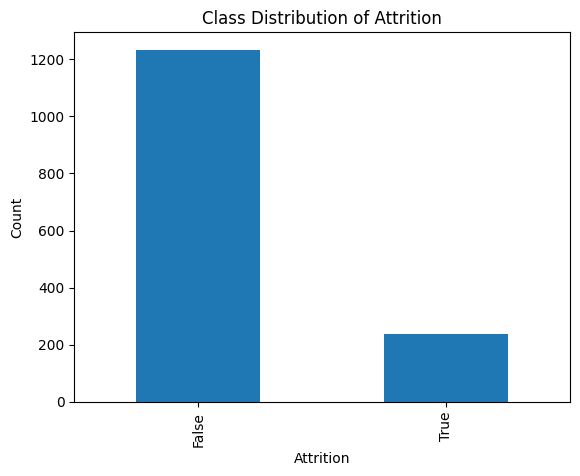

In [13]:
import matplotlib.pyplot as plt

feature_matrix['Attrition'].value_counts().plot(kind='bar')
plt.title("Class Distribution of Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming feature_matrix is the output from Featuretools dfs() and includes Attrition column

# 1. Check missing values
missing_counts = feature_matrix.isnull().sum()
print("Missing values per feature:\n", missing_counts[missing_counts > 0])

# 2. Impute missing numeric features with median
numeric_cols = feature_matrix.select_dtypes(include=['number']).columns.tolist()
imputer = SimpleImputer(strategy='median')
feature_matrix[numeric_cols] = imputer.fit_transform(feature_matrix[numeric_cols])

# 3. Encode categorical columns if any (Featuretools often creates numeric, but just in case)
categorical_cols = feature_matrix.select_dtypes(include=['object', 'category']).columns.tolist()
if categorical_cols:
    for col in categorical_cols:
        le = LabelEncoder()
        feature_matrix[col] = le.fit_transform(feature_matrix[col].astype(str))

# 4. Convert Attrition target to numeric if it's not already
if feature_matrix['Attrition'].dtype == 'object':
    feature_matrix['Attrition'] = feature_matrix['Attrition'].map({'Yes': 1, 'No': 0})

# 5. Separate features and target
X = feature_matrix.drop(['Attrition'], axis=1)
y = feature_matrix['Attrition']





Missing values per feature:
 Series([], dtype: int64)
Shape of training data: (1176, 32)
Shape of test data: (294, 32)


In [18]:
!pip install imblearn

from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original class distribution:", Counter(y))

# Calculate the desired total minority count
desired_minority_count = 237 + 100  # original minority + 100 new samples

# Calculate sampling_strategy as a fraction of the majority size
majority_count = 1233
sampling_strategy = desired_minority_count / majority_count  # e.g., 337/1233 ~ 0.273

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled class distribution:", Counter(y_resampled))



Original class distribution: Counter({False: 1233, True: 237})
Resampled class distribution: Counter({False: 1233, True: 337})



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:

# 6. (Optional) Train-test split for model building
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

print(f'Shape of training data: {X_train.shape}')
print(f'Shape of test data: {X_test.shape}')

# Now X_train, y_train, X_test, y_test are ready for modeling

Shape of training data: (1256, 32)
Shape of test data: (314, 32)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [23]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [24]:
y_test.value_counts()[0] / y_test.shape[0]

C:\Users\ctrid\AppData\Local\Temp\ipykernel_15160\1927410138.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test.value_counts()[0] / y_test.shape[0]


np.float64(0.7866242038216561)

In [25]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 78.50%
Leaving Rate: 21.50%
===============TEST=================
Staying Rate: 78.66%
Leaving Rate: 21.34%


C:\Users\ctrid\AppData\Local\Temp\ipykernel_15160\329314148.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stay = (y_train.value_counts()[0] / y_train.shape)[0]
C:\Users\ctrid\AppData\Local\Temp\ipykernel_15160\329314148.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  leave = (y_train.value_counts()[1] / y_train.shape)[0]
C:\Users\ctrid\AppData\Local\Temp\ipykernel_15160\329314148.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

In [29]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[946  40]
 [155 115]]
ACCURACY SCORE:
0.8447
CLASSIFICATION REPORT:
                False        True  accuracy    macro avg  weighted avg
precision    0.859219    0.741935  0.844745     0.800577      0.834007
recall       0.959432    0.425926  0.844745     0.692679      0.844745
f1-score     0.906564    0.541176  0.844745     0.723870      0.828018
support    986.000000  270.000000  0.844745  1256.000000   1256.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[230  17]
 [ 38  29]]
ACCURACY SCORE:
0.8248
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.858209   0.630435  0.824841    0.744322      0.809607
recall       0.931174   0.432836  0.824841    0.682005      0.824841
f1-score     0.893204   0.513274  0.824841    0.703239      0.812136
support    247.000000  67.000000  0.824841  314.000000    314.000000


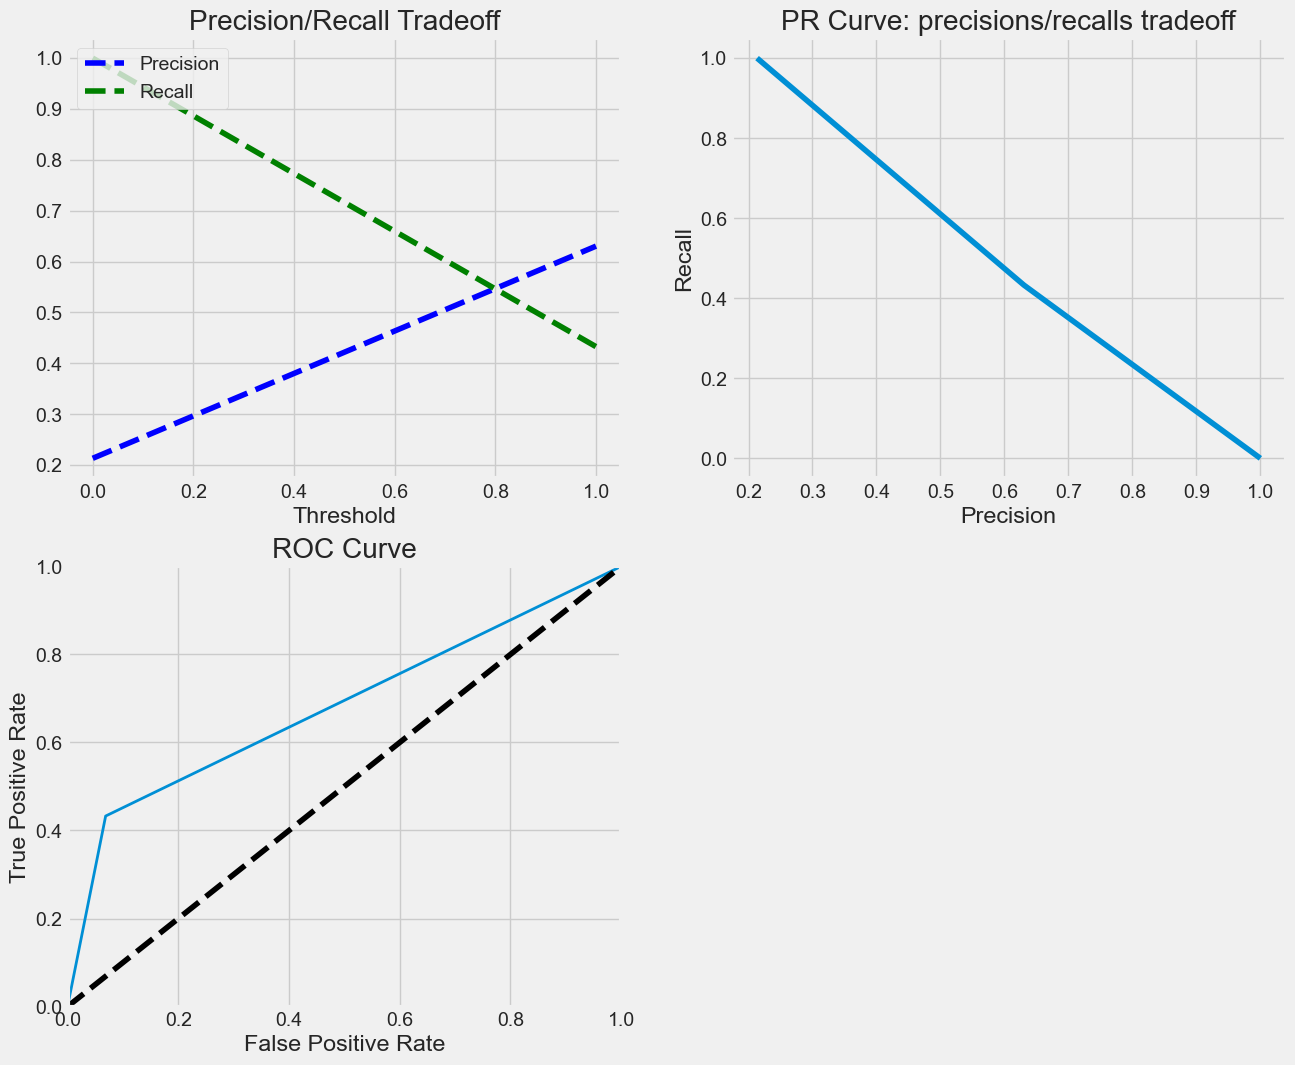

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [43]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

RANDOM FOREST CLASSIFIER

In [37]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[986   0]
 [  0 270]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    986.0  270.0       1.0     1256.0        1256.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[240   7]
 [ 40  27]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.857143   0.794118  0.850318    0.825630      0.843695
recall       0.971660   0.402985  0.850318    0.687322      0.850318
f1-score     0.910816   0.534653  0.850318    0.722735      0.830552
support    247.000000  67.000000  0.850318  314.000000    314.000000


In [38]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[986   0]
 [  0 270]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    986.0  270.0       1.0     1256.0        1256.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[243   4]
 [ 45  22]]
ACCURACY SCORE:
0.8439
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.843750   0.846154  0.843949    0.844952      0.844263
recall       0.983806   0.328358  0.843949    0.656082      0.843949
f1-score     0.908411   0.473118  0.843949    0.690765      0.815530
support    247.000000  67.000000  0.843949  314.000000    314.000000


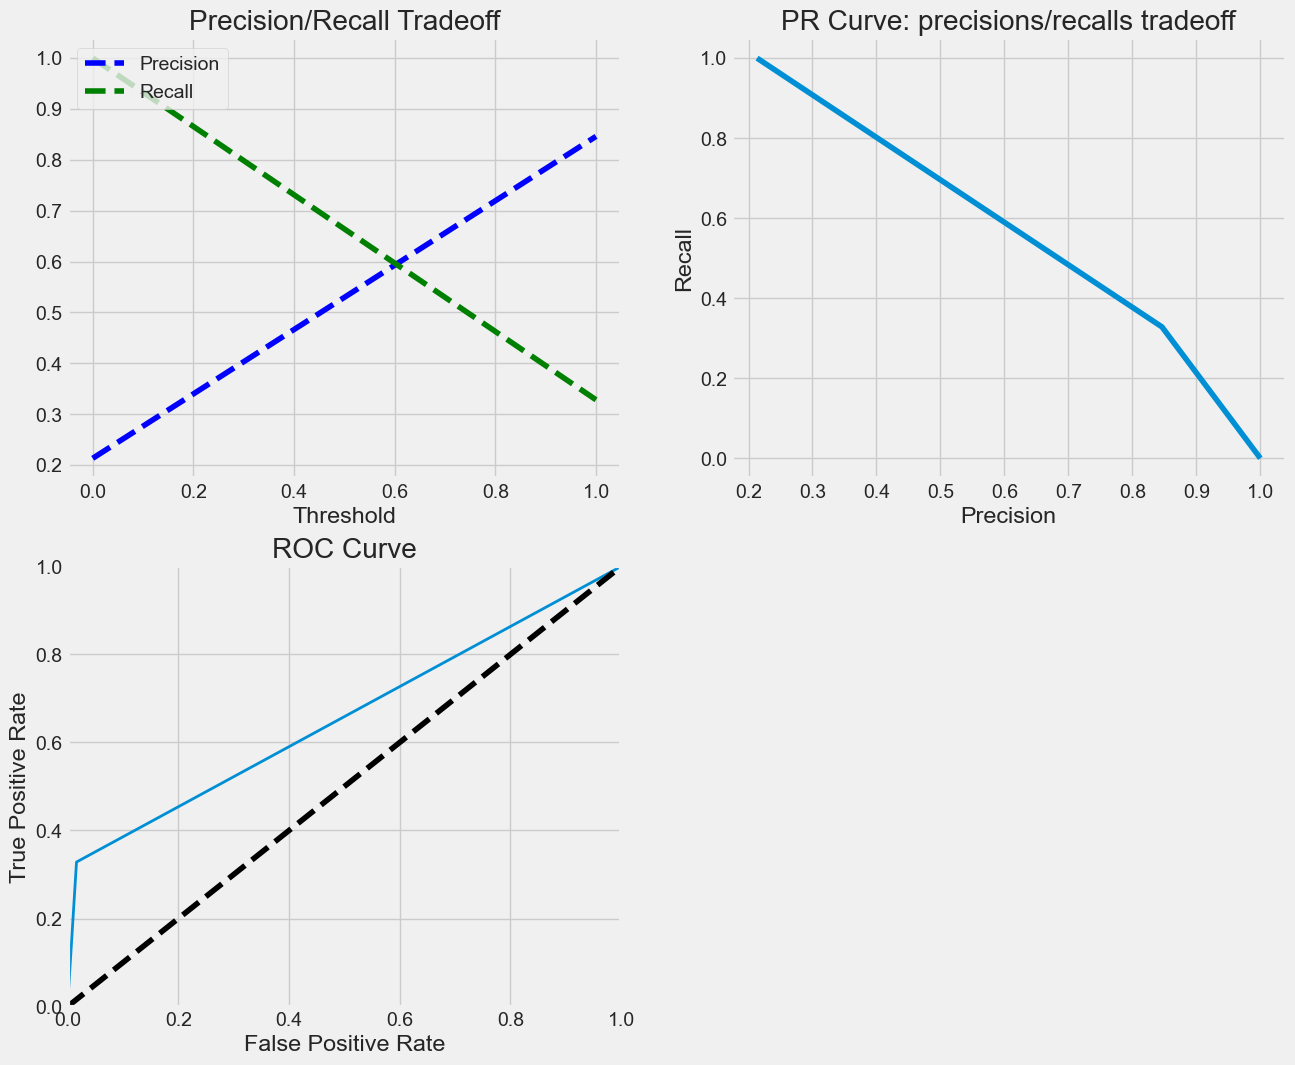

In [39]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [44]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

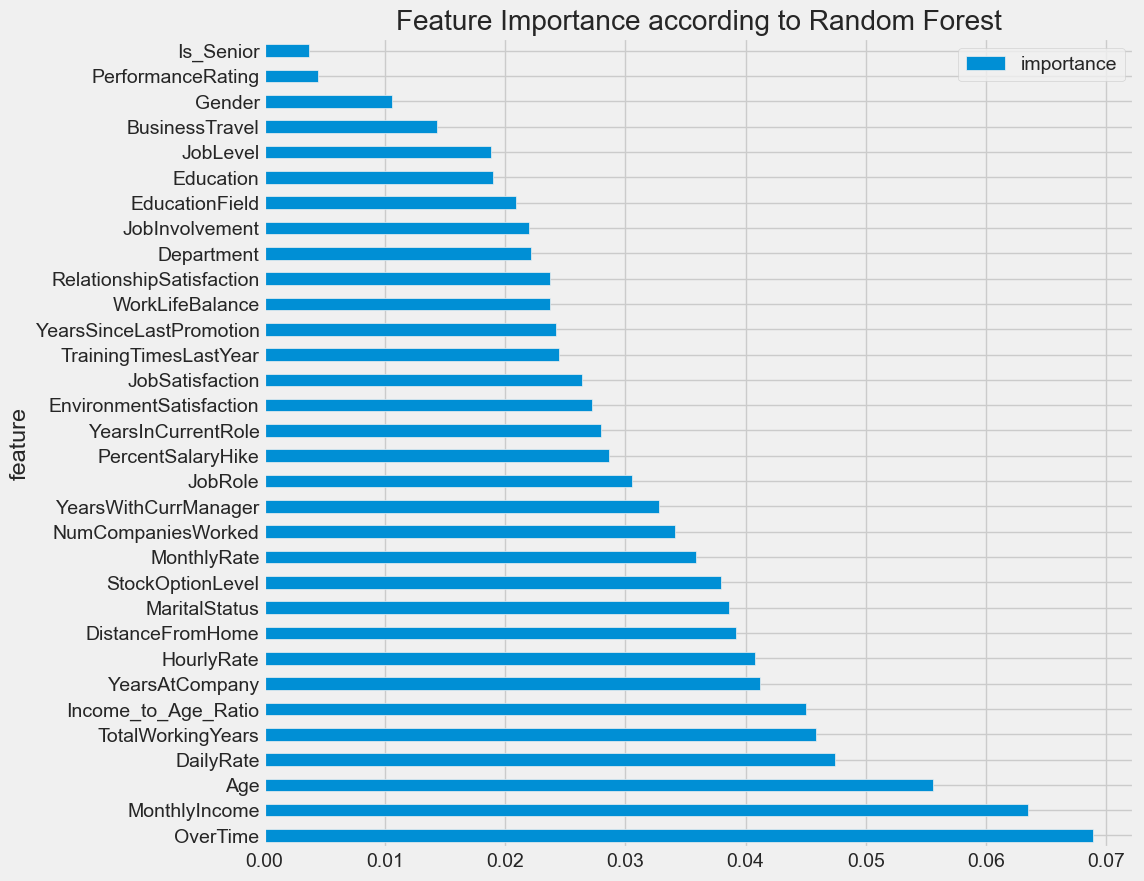

In [41]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

XGB Classifier

In [42]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[986   0]
 [  0 270]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    986.0  270.0       1.0     1256.0        1256.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[242   5]
 [ 35  32]]
ACCURACY SCORE:
0.8726
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.873646   0.864865  0.872611    0.869256      0.871772
recall       0.979757   0.477612  0.872611    0.728685      0.872611
f1-score     0.923664   0.615385  0.872611    0.769524      0.857885
support    247.000000  67.000000  0.872611  314.000000    314.000000


In [45]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

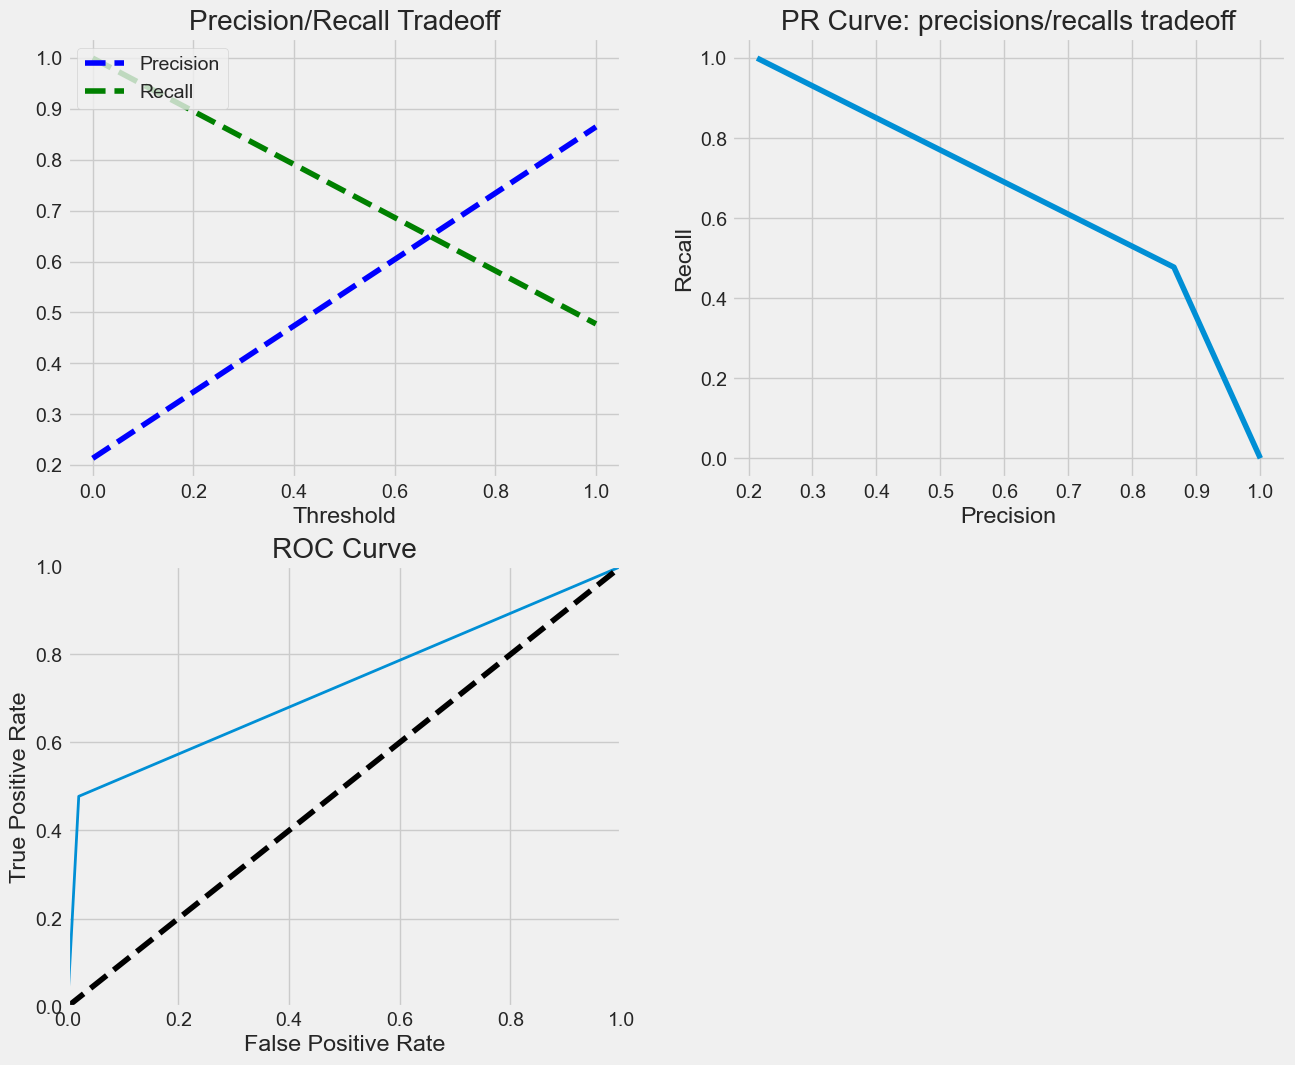

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

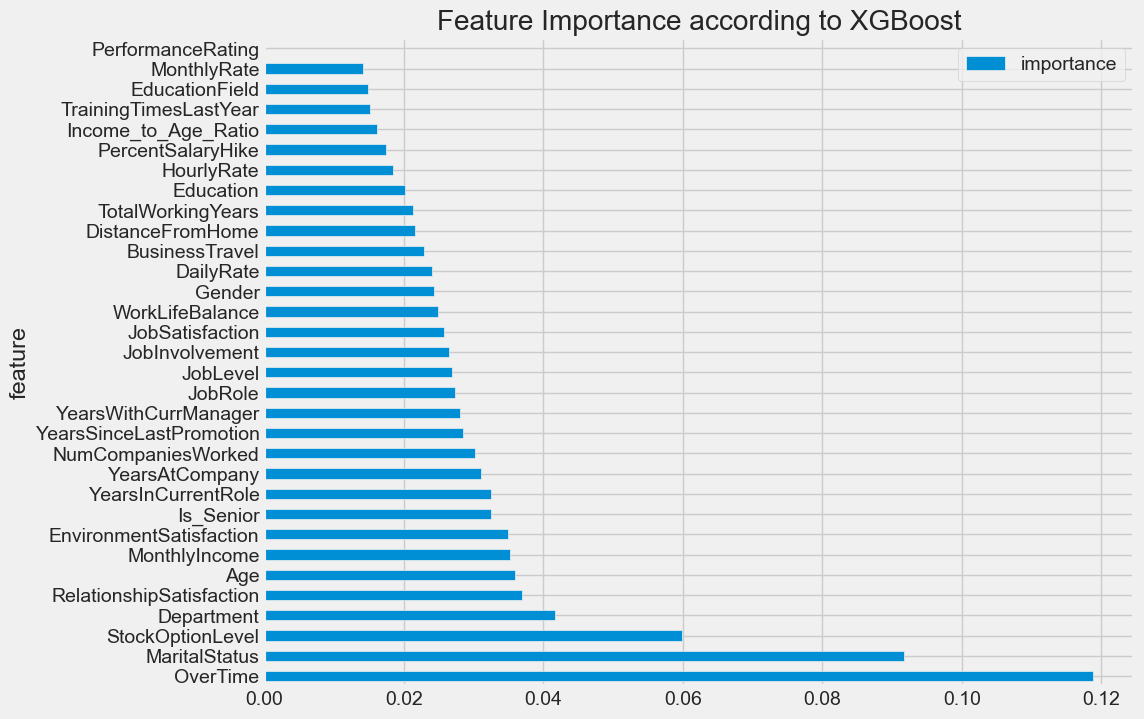

In [47]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

AdaBoost Classifier

In [48]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[964  22]
 [116 154]]
ACCURACY SCORE:
0.8901
CLASSIFICATION REPORT:
                False        True  accuracy    macro avg  weighted avg
precision    0.892593    0.875000  0.890127     0.883796      0.888811
recall       0.977688    0.570370  0.890127     0.774029      0.890127
f1-score     0.933204    0.690583  0.890127     0.811894      0.881048
support    986.000000  270.000000  0.890127  1256.000000   1256.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[242   5]
 [ 36  31]]
ACCURACY SCORE:
0.8694
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.870504   0.861111  0.869427    0.865807      0.868499
recall       0.979757   0.462687  0.869427    0.721222      0.869427
f1-score     0.921905   0.601942  0.869427    0.761923      0.853632
support    247.000000  67.000000  0.869427  314.000000    314.000000


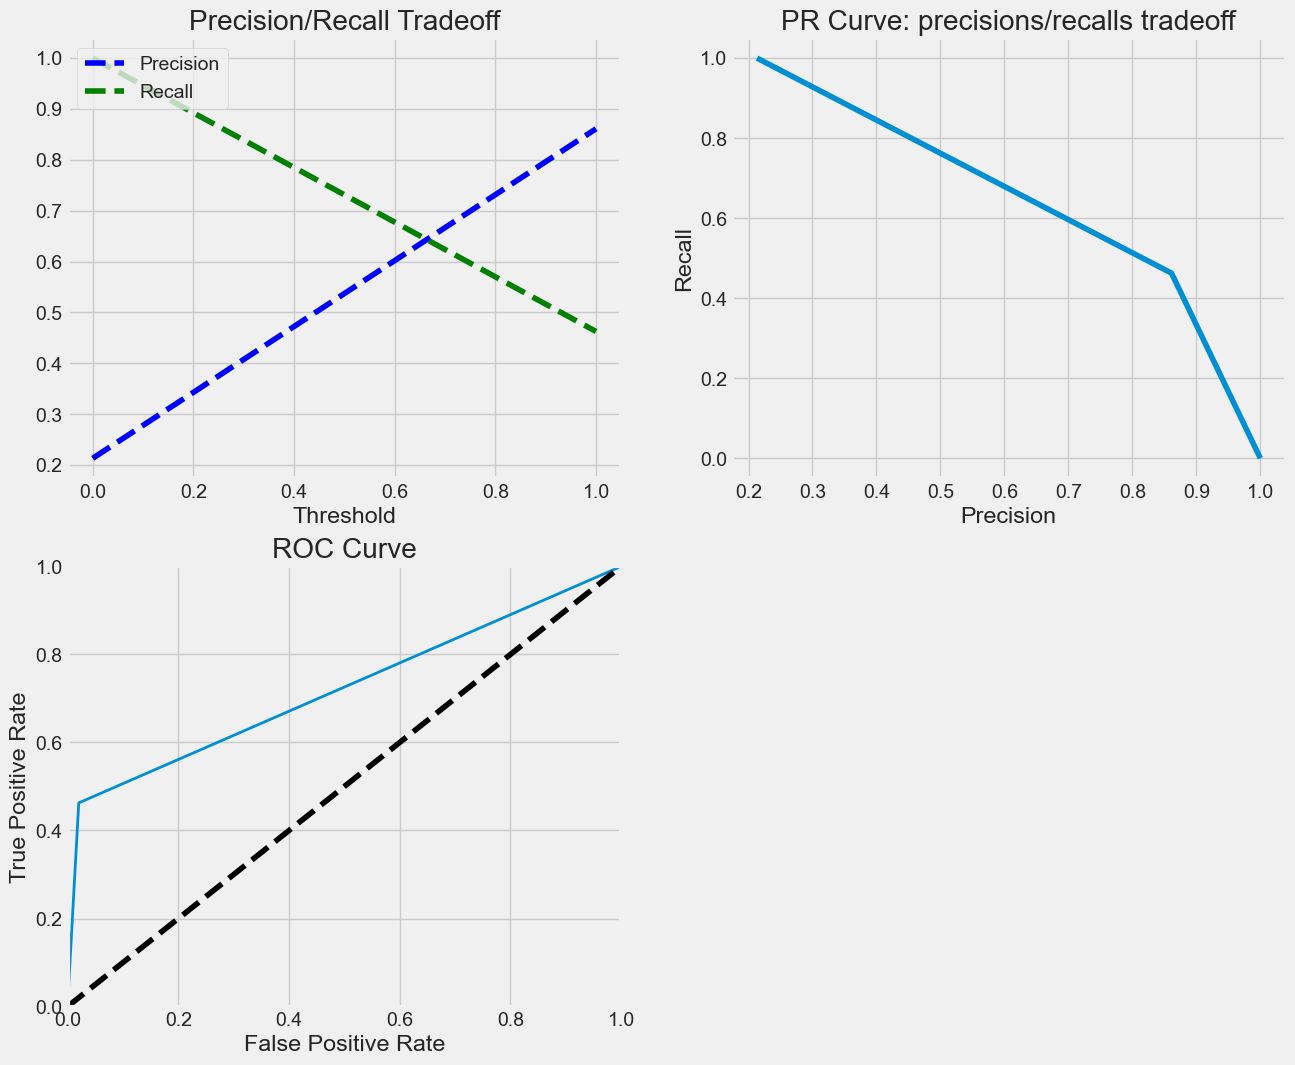

In [49]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [50]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),
    }

In [54]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.656
XGBOOST                        roc_auc_score: 0.729
LOGISTIC REGRESSION            roc_auc_score: 0.500
ADABOOST                       roc_auc_score: 0.721


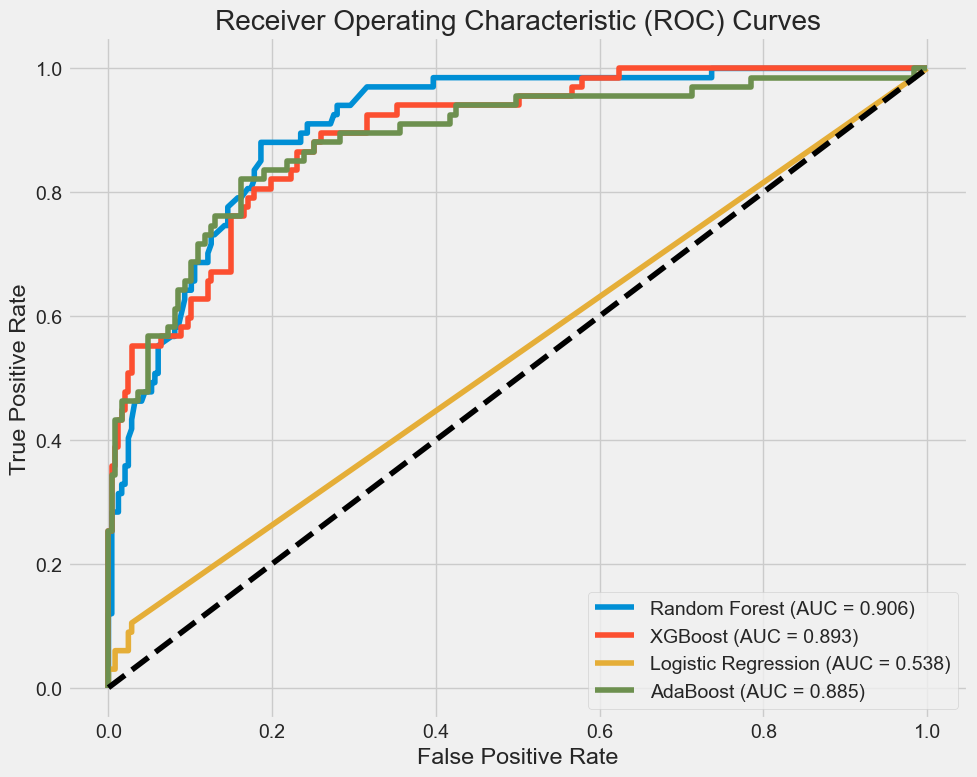

In [55]:
plt.figure(figsize=(10, 8))

# Iterate through each model
for model_name, model in ml_models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        # Predict probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()